## importing liberary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import ruptures as rpt
#import pymc as pm

In [2]:
import warnings
warnings.filterwarnings('ignore')

## file reading

In [3]:
# Load data
data = pd.read_csv('../data/raw/Copy of BrentOilPrices.csv')

In [4]:
data

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37


In [5]:
print(data.columns)


Index(['Date', 'Price'], dtype='object')


In [6]:
print(data.head())


        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63


In [7]:
# Convert 'Date' column to datetime, letting pandas infer the format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # 'errors=coerce' will set invalid dates to NaT

# Rename 'Date' column to 'date'
data.rename(columns={'Date': 'date'}, inplace=True)

# Sort by 'date' and set it as the index
data = data.sort_values(by='date')
data = data.set_index('date')

# Preprocess the data
data['Price'] = data['Price'].interpolate()

In [8]:
data

,Price
date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2022-11-08,96.85
2022-11-09,93.05
2022-11-10,94.25


In [9]:
# Ensure consistency of data types
data['Price'] = data['Price'].astype(float)

# Save processed data

In [10]:
# Save processed data
data.to_csv('../data/processed/processed_brent_oil_prices.csv')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9011 entries, 1987-05-20 to 2022-11-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9011 non-null   float64
dtypes: float64(1)
memory usage: 140.8 KB


## External data

In [12]:
df1 = pd.read_csv('../data/external/World Development Indicators 2/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_9865.csv')

In [13]:
df1

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.121696e+10,2.230747e+10,2.370247e+10,2.577938e+10,2.804954e+10,3.037491e+10,...,9.796900e+11,8.992960e+11,8.298300e+11,9.401050e+11,1.012720e+12,1.006530e+12,9.290740e+11,1.086770e+12,1.183960e+12,1.236160e+12
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,1.450216e+10,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.188413e+10,1.268566e+10,1.360683e+10,1.443998e+10,1.576911e+10,1.693448e+10,...,8.945850e+11,7.693670e+11,6.921810e+11,6.857500e+11,7.681900e+11,8.239340e+11,7.871470e+11,8.459930e+11,8.771410e+11,7.965860e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.359670e+11,9.049642e+10,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.044000e+11,8.472296e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.074395e+09,6.295848e+09,6.682677e+09,7.180765e+09,7.878760e+09,7.899738e+09,7.717145e+09,9.413404e+09,9.354903e+09,1.043835e+10
262,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.322859e+10,4.244449e+10,3.131783e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,...,3.811990e+11,3.467100e+11,3.235860e+11,3.814490e+11,4.052610e+11,3.893300e+11,3.382910e+11,4.201180e+11,4.052710e+11,3.777820e+11
264,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631151e+10,2.330867e+10,1.813776e+10,2.209642e+10,2.916378e+10,2.816263e+10


In [34]:
df1["Country Name"].value_counts

<bound method IndexOpsMixin.value_counts of 0                            Aruba
1      Africa Eastern and Southern
2                      Afghanistan
3       Africa Western and Central
4                           Angola
                  ...             
261                         Kosovo
262                    Yemen, Rep.
263                   South Africa
264                         Zambia
265                       Zimbabwe
Name: Country Name, Length: 266, dtype: object>

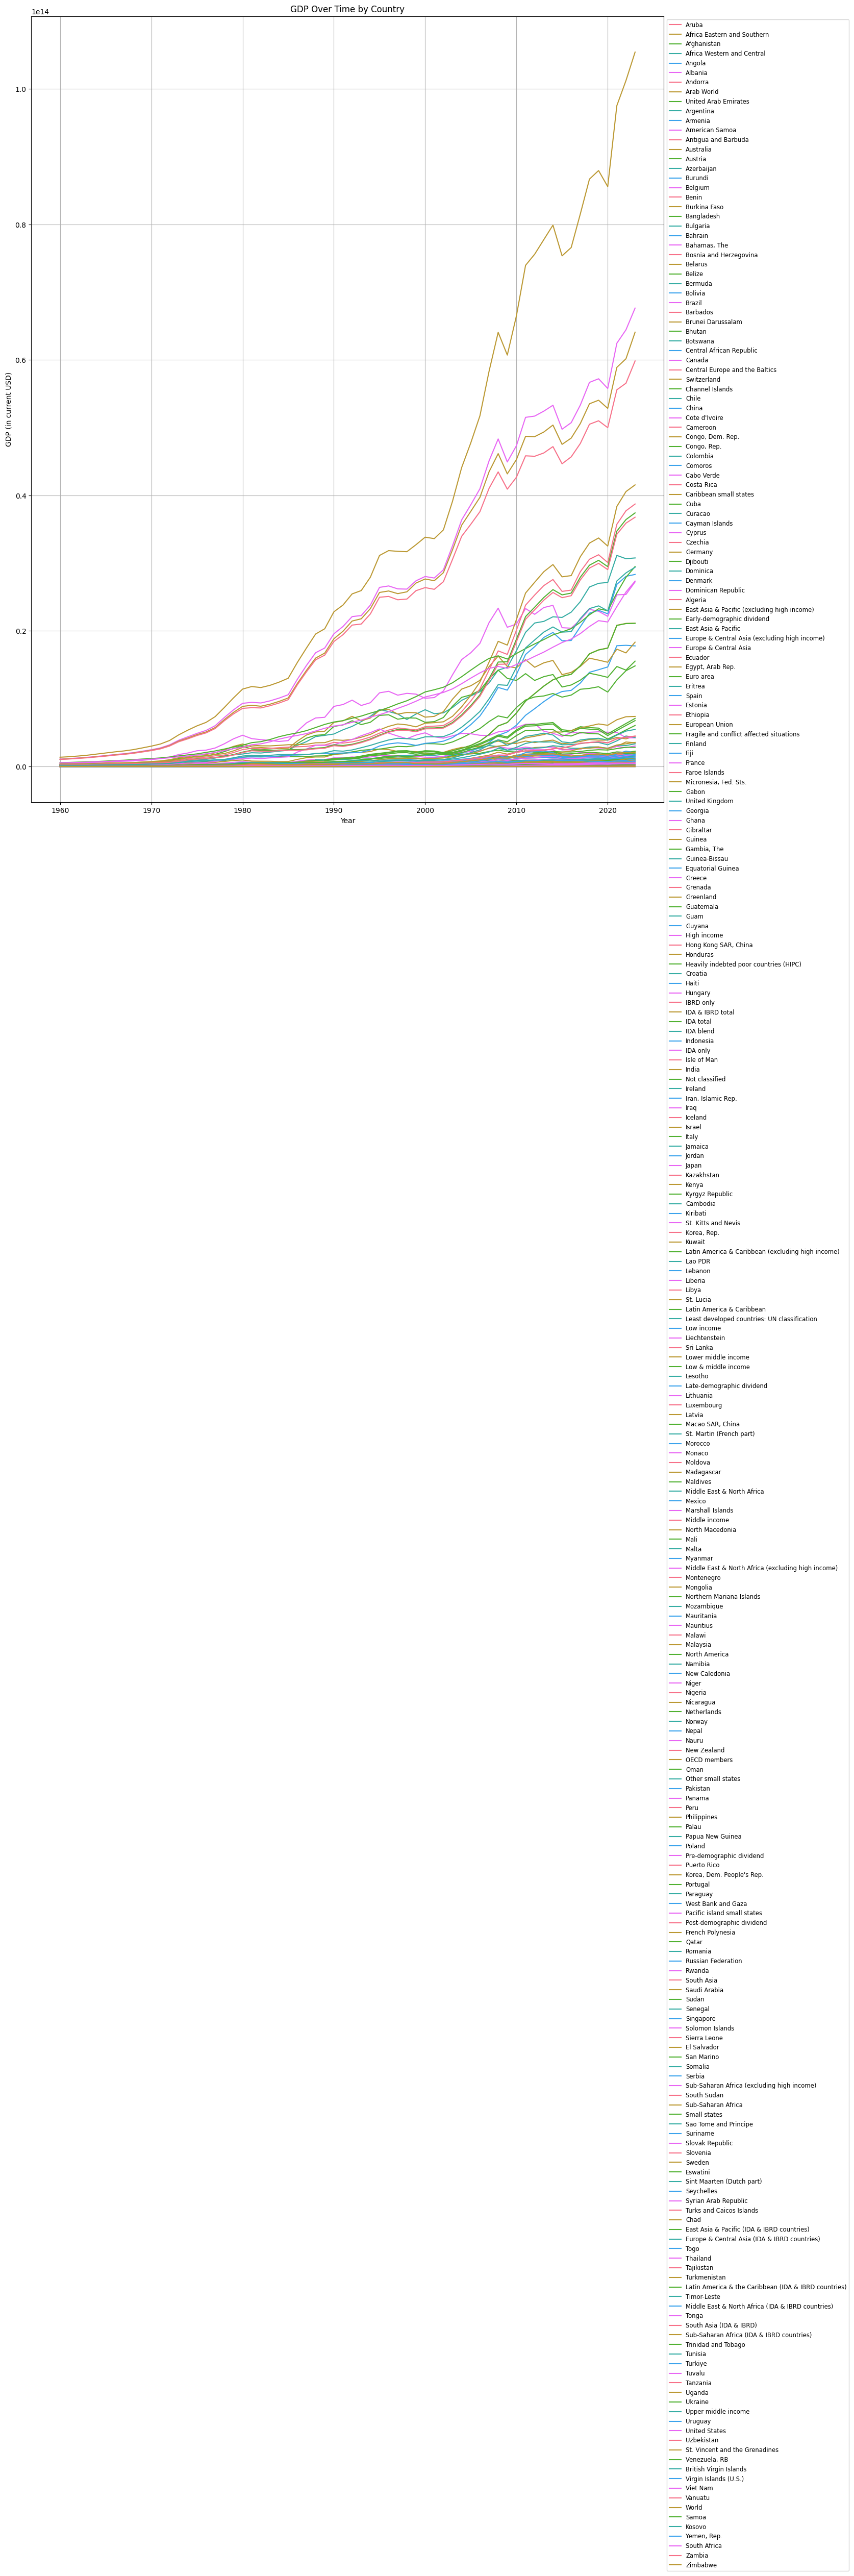

In [35]:
import matplotlib.pyplot as plt

# Filter the dataset to include only rows related to GDP
gdp_data = df1[df1['Indicator Name'] == 'GDP (current US$)']

# Extract the years from the columns starting after the metadata columns
years = gdp_data.columns[4:].astype(int)

# Initialize the plot
plt.figure(figsize=(16, 20))

# Loop over each country in the GDP dataset
for _, row in gdp_data.iterrows():
    country_name = row['Country Name']
    gdp_values = row[4:].values  # Extract GDP values for each year
    plt.plot(years, gdp_values, label=country_name)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('GDP (in current USD)')
plt.title('GDP Over Time by Country')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1, fontsize='small')
plt.grid(True)
plt.tight_layout()  # Adjust layout for readability

# Show plot
plt.show()

## selected countries and GDP indicator

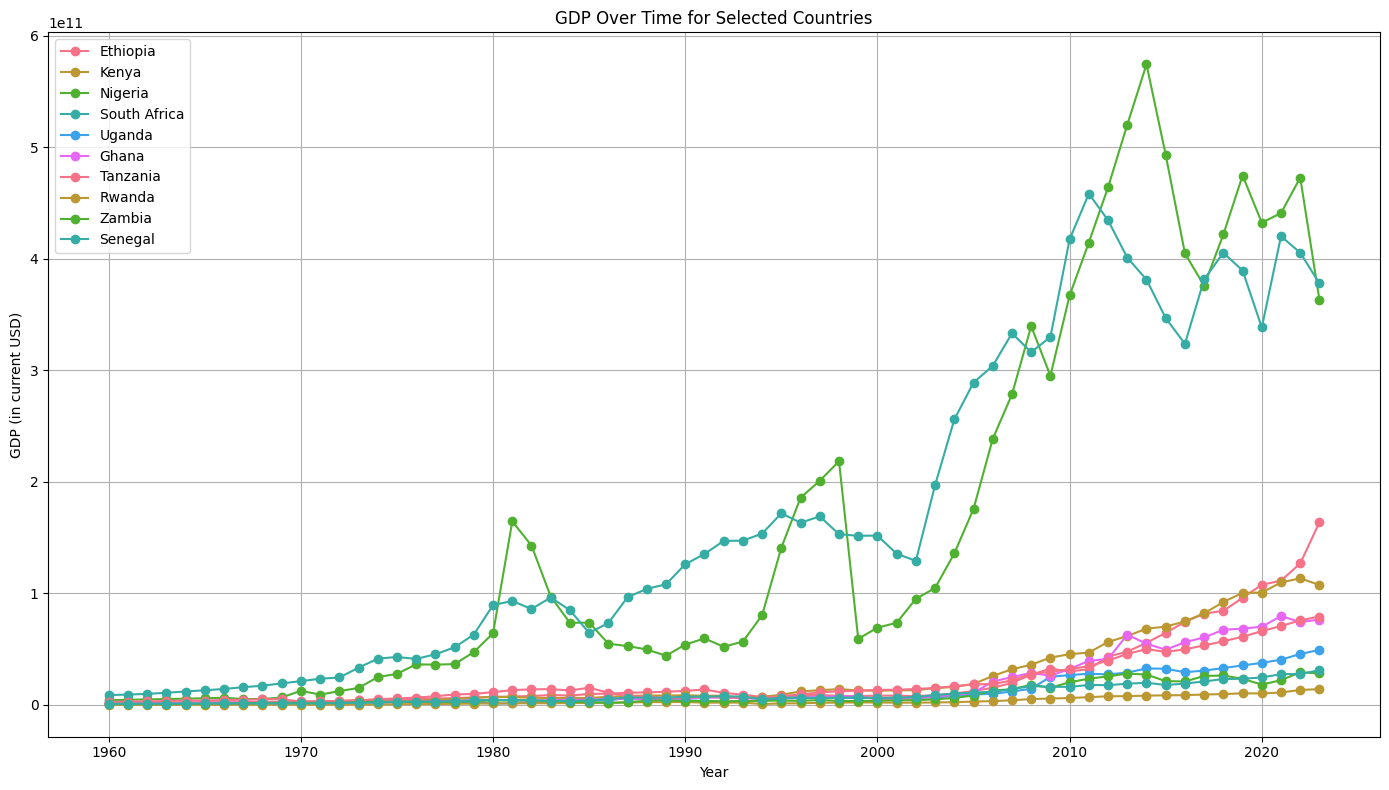

In [ ]:
# Define your selected countries and the indicator name
selected_countries = ['Ethiopia', 'Kenya', 'Nigeria', 'South Africa', 'Uganda',
                      'Ghana', 'Tanzania', 'Rwanda', 'Zambia', 'Senegal']

# Filter for selected countries and GDP indicator
gdp_data = df1[(df1['Country Name'].isin(selected_countries)) & 
               (df1['Indicator Name'] == 'GDP (current US$)')]

# Ensure data is not empty
if gdp_data.empty:
    print("No GDP data found for the selected countries. Please check the indicator name.")
else:
    # Extract years as string to avoid KeyError
    years = gdp_data.columns[4:]  # Assuming the first 4 columns are metadata
    years = years.astype(str)  # Convert to strings

    # Plotting GDP data over time for each selected country
    plt.figure(figsize=(14, 8))
    
    for country in selected_countries:
        country_data = gdp_data[gdp_data['Country Name'] == country]
        gdp_values = country_data[years].values.flatten()  # Flatten to 1D array
        plt.plot(years.astype(int), gdp_values, marker='o', label=country)  # Convert years to int for plotting

    plt.xlabel('Year')
    plt.ylabel('GDP (in current USD)')
    plt.title('GDP Over Time for Selected Countries')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Earning Data

In [25]:
df_earn = pd.read_csv('../data/external/EARNINGS@AV_AN_WAGE,+all.csv')
df_earn

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,MEASURE,Measure,UNIT_MEASURE,Unit of measure,...,OBS_VALUE,Observation value,BASE_PER,Base period,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,DATAFLOW,OECD.ELS.SAE:DSD_EARNINGS@AV_AN_WAGE(1.0),Average annual wages,I,AUS,Australia,WG,Wages,AUD,Australian dollar,...,90855.245,NaN,2022.0,NaN,A,Normal value,0,Units,0,Zero
1,DATAFLOW,OECD.ELS.SAE:DSD_EARNINGS@AV_AN_WAGE(1.0),Average annual wages,I,AUS,Australia,WG,Wages,AUD,Australian dollar,...,91396.280,NaN,2022.0,NaN,A,Normal value,0,Units,0,Zero
2,DATAFLOW,OECD.ELS.SAE:DSD_EARNINGS@AV_AN_WAGE(1.0),Average annual wages,I,AUS,Australia,WG,Wages,AUD,Australian dollar,...,90496.064,NaN,2022.0,NaN,A,Normal value,0,Units,0,Zero
3,DATAFLOW,OECD.ELS.SAE:DSD_EARNINGS@AV_AN_WAGE(1.0),Average annual wages,I,AUS,Australia,WG,Wages,AUD,Australian dollar,...,82519.370,NaN,NaN,NaN,A,Normal value,0,Units,0,Zero
4,DATAFLOW,OECD.ELS.SAE:DSD_EARNINGS@AV_AN_WAGE(1.0),Average annual wages,I,AUS,Australia,WG,Wages,AUD,Australian dollar,...,80883.161,NaN,NaN,NaN,A,Normal value,0,Units,0,Zero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,DATAFLOW,OECD.ELS.SAE:DSD_EARNINGS@AV_AN_WAGE(1.0),Average annual wages,I,POL,Poland,WG,Wages,PLN,Zloty,...,57212.578,NaN,2022.0,NaN,A,Normal value,0,Units,0,Zero
2726,DATAFLOW,OECD.ELS.SAE:DSD_EARNINGS@AV_AN_WAGE(1.0),Average annual wages,I,SWE,Sweden,WG,Wages,SEK,Swedish krona,...,479318.160,NaN,2022.0,NaN,A,Normal value,0,Units,0,Zero
2727,DATAFLOW,OECD.ELS.SAE:DSD_EARNINGS@AV_AN_WAGE(1.0),Average annual wages,I,TUR,Türkiye,WG,Wages,TRY,Turkish lira,...,150691.550,NaN,2022.0,NaN,A,Normal value,0,Units,0,Zero
2728,DATAFLOW,OECD.ELS.SAE:DSD_EARNINGS@AV_AN_WAGE(1.0),Average annual wages,I,USA,United States,WG,Wages,USD,US dollar,...,55781.232,NaN,NaN,NaN,A,Normal value,0,Units,0,Zero


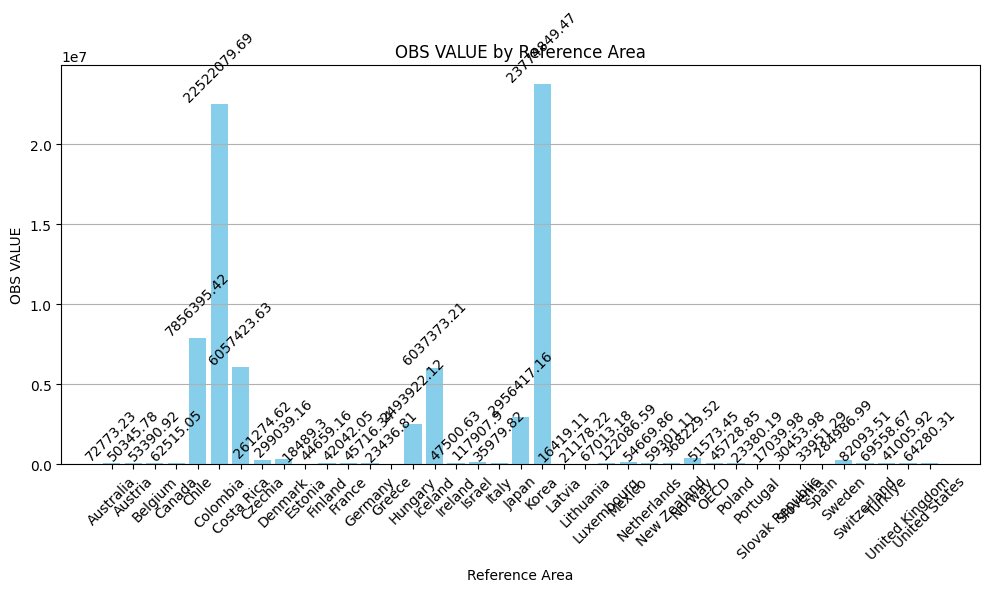

In [28]:
# Optionally group the data by 'Reference area' and calculate the mean OBS_VALUE
grouped_df = df_earn.groupby('Reference area')['OBS_VALUE'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_df['Reference area'], grouped_df['OBS_VALUE'], color='skyblue')
plt.xlabel('Reference Area')
plt.ylabel('OBS VALUE')
plt.title('OBS VALUE by Reference Area')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding the value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', rotation=45)

# Show the plot
plt.tight_layout()
plt.show()